In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [102]:
df=pd.read_csv("events.csv")
#df['Start_X'] = abs(df['Start_X'] - 100)
df['Start_Y'] = abs(df['Start_Y'] - 100)
#df['End_X'] = abs(df['End_X'] - 100)
df['End_Y'] = abs(df['End_Y'] - 100)
#df=df[df["Mins"]<48]
df.head()

,Team,Player,Event,Mins,Secs,Start_X,Start_Y,End_X,End_Y
0,Galatasaray,Boey,Pass Unsuccessful,3,0,53,98,50,96
1,Galatasaray,Boey,Pass Successful,3,28,45,99,47,91
2,Galatasaray,Boey,Pass Unsuccessful,3,53,41,89,35,88
3,Galatasaray,Boey,Pass Successful,4,47,66,91,73,88
4,Galatasaray,Boey,Pass Successful,4,50,72,96,86,76


In [103]:
df["Start_Y"]=df["Start_Y"]*0.79
df["End_Y"]=df["End_Y"]*0.79
df["Start_X"]=df["Start_X"]*1.2
df["End_X"]=df["End_X"]*1.2

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


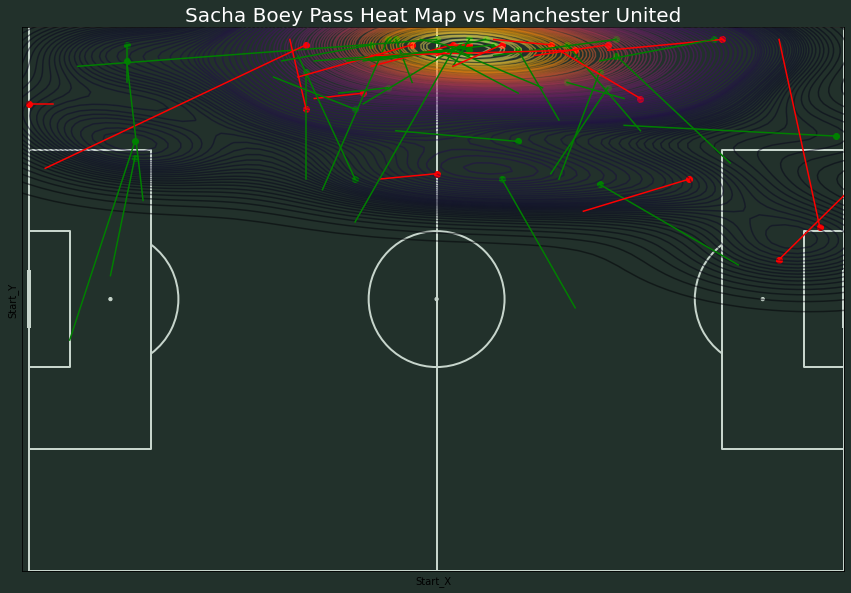

In [185]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('#22312b')
pitch= Pitch(pitch_type='statsbomb', 
             pitch_length=120, pitch_width=80,
            pitch_color='#22312b', line_color='#c7d5cc', axis=True
            )

kde=sns.kdeplot(df["Start_X"],df["Start_Y"],  alpha=0.5, shade=False, shade_lowest=True, n_levels=100, cmap='inferno', cut=10)


pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df["Start_X"])):
    if df["Event"][x]=='Pass Successful':
        plt.plot((df["Start_X"][x], df["End_X"][x]), (df["Start_Y"][x], df["End_Y"][x]), color='green')
        plt.scatter(df["Start_X"][x], df["Start_Y"][x], color='green')
    if df["Event"][x]=='Pass Unsuccessful':
        plt.plot((df["Start_X"][x], df["End_X"][x]), (df["Start_Y"][x], df["End_Y"][x]), color='red')
        plt.scatter(df["Start_X"][x], df["Start_Y"][x], color='red')
        
plt.title("Sacha Boey Pass Heat Map vs Manchester United", color='white', size=20)
ax.set_xlim([-1, 120])  # X ekseni sınırları
ax.set_ylim([0, 80])   # Y ekseni sınırları
plt.savefig('my_plot.png')